# Sharpe Ratio and Portfolio Values

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader.data as web
import datetime

## Create a Portfolio

In [31]:
#define our start and end date
start=datetime.datetime(2021,1,1)
end=datetime.datetime(2021,2,18)

In [32]:
# Grabbing a bunch of ','yahoo', start,end)
aapl = web.DataReader('AAPL','yahoo', start,end)
cisco= web.DataReader('CSCO','yahoo', start,end)
ibm = web.DataReader('IBM','yahoo', start,end)
amzn = web.DataReader('AMZN','yahoo', start,end)

In [33]:
aapl.index = pd.to_datetime(aapl.index)
cisco.index = pd.to_datetime(cisco.index)
ibm.index = pd.to_datetime(ibm.index)
amzn.index = pd.to_datetime(amzn.index)

In [34]:
aapl.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-01-04,133.610001,126.760002,133.520004,129.410004,143301900.0,129.216919
2021-01-05,131.740005,128.429993,128.889999,131.009995,97664900.0,130.814514
2021-01-06,131.050003,126.379997,127.720001,126.599998,155088000.0,126.411102
2021-01-07,131.630005,127.860001,128.360001,130.919998,109578200.0,130.724655
2021-01-08,132.630005,130.229996,132.429993,132.050003,105158200.0,131.852966


## Normalize Prices

In [35]:
for stock_df in (aapl,cisco,ibm,amzn):
    stock_df['Normed Return'] = stock_df['Adj Close']/stock_df.iloc[0]['Adj Close']

In [36]:
aapl.head()

,High,Low,Open,Close,Volume,Adj Close,Normed Return
Date,,,,,,,
2021-01-04,133.610001,126.760002,133.520004,129.410004,143301900.0,129.216919,1.000000
2021-01-05,131.740005,128.429993,128.889999,131.009995,97664900.0,130.814514,1.012364
2021-01-06,131.050003,126.379997,127.720001,126.599998,155088000.0,126.411102,0.978286
2021-01-07,131.630005,127.860001,128.360001,130.919998,109578200.0,130.724655,1.011668
2021-01-08,132.630005,130.229996,132.429993,132.050003,105158200.0,131.852966,1.020400


### Allocations
Let's pretend we had the following allocations for our total portfolio:

- 30% in Apple
- 20% in Google/Alphabet
- 40% in Amazon
- 10% in IBM

In [37]:
for stock_df,allo in zip([aapl,cisco,ibm,amzn],[.3,.2,.4,.1]):
    stock_df['Allocation'] = stock_df['Normed Return']*allo

In [38]:
aapl.head()

,High,Low,Open,Close,Volume,Adj Close,Normed Return,Allocation
Date,,,,,,,,
2021-01-04,133.610001,126.760002,133.520004,129.410004,143301900.0,129.216919,1.000000,0.300000
2021-01-05,131.740005,128.429993,128.889999,131.009995,97664900.0,130.814514,1.012364,0.303709
2021-01-06,131.050003,126.379997,127.720001,126.599998,155088000.0,126.411102,0.978286,0.293486
2021-01-07,131.630005,127.860001,128.360001,130.919998,109578200.0,130.724655,1.011668,0.303500
2021-01-08,132.630005,130.229996,132.429993,132.050003,105158200.0,131.852966,1.020400,0.306120


In [39]:
aapl.tail()

,High,Low,Open,Close,Volume,Adj Close,Normed Return,Allocation
Date,,,,,,,,
2021-02-11,136.389999,133.770004,135.899994,135.130005,64154400.0,135.130005,1.045761,0.313728
2021-02-12,135.529999,133.690002,134.350006,135.369995,60029300.0,135.369995,1.047618,0.314285
2021-02-16,136.009995,132.789993,135.490005,133.190002,80206200.0,133.190002,1.030747,0.309224
2021-02-17,132.220001,129.470001,131.250000,130.839996,97918500.0,130.839996,1.012561,0.303768
2021-02-18,130.000000,127.410004,129.199997,129.710007,96648100.0,129.710007,1.003816,0.301145


### Investment
Let's pretend we invested a million dollars in this portfolio

In [40]:
for stock_df in [aapl,cisco,ibm,amzn]:
    stock_df['Position Values'] = stock_df['Allocation']*1000000

### Total Portfolio Value

In [41]:
portfolio_val = pd.concat([aapl['Position Values'],cisco['Position Values'],ibm['Position Values'],amzn['Position Values']],axis=1)

In [43]:
portfolio_val.tail()

,Position Values,Position Values,Position Values,Position Values
Date,,,,
2021-02-11,313728.277966,216469.530582,395435.549690,102369.274211
2021-02-12,314285.457869,215150.145134,395075.793255,102858.194440
2021-02-16,309224.218148,211601.452640,392688.321003,102583.295563
2021-02-17,303768.262096,210418.566712,392361.276504,103828.810193
2021-02-18,301144.790727,210828.030563,394846.859611,104443.569001


In [44]:
portfolio_val.columns = ['AAPL Pos','CISCO Pos','IBM Pos','AMZN Pos']

In [46]:
portfolio_val.tail()

,AAPL Pos,CISCO Pos,IBM Pos,AMZN Pos
Date,,,,
2021-02-11,313728.277966,216469.530582,395435.549690,102369.274211
2021-02-12,314285.457869,215150.145134,395075.793255,102858.194440
2021-02-16,309224.218148,211601.452640,392688.321003,102583.295563
2021-02-17,303768.262096,210418.566712,392361.276504,103828.810193
2021-02-18,301144.790727,210828.030563,394846.859611,104443.569001


In [47]:
portfolio_val['Total Pos'] = portfolio_val.sum(axis=1)

Text(0.5, 1.0, 'Total Portfolio Value')

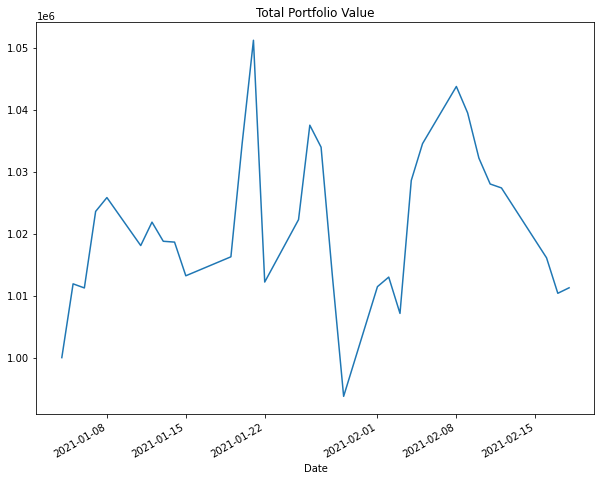

In [48]:
portfolio_val['Total Pos'].plot(figsize=(10,8))
plt.title('Total Portfolio Value')

<AxesSubplot:xlabel='Date'>

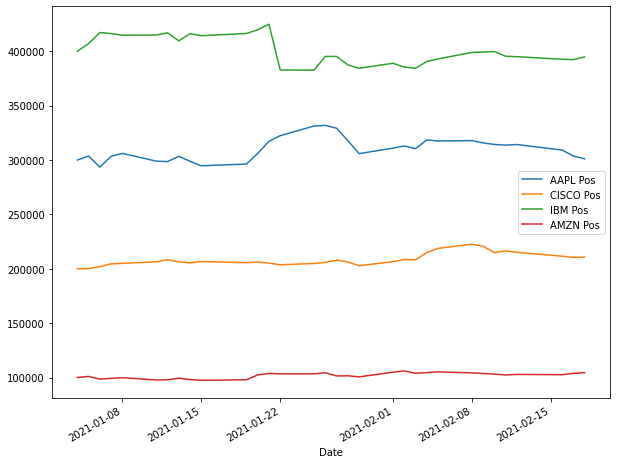

In [51]:
portfolio_val.drop('Total Pos',axis=1).plot(kind='line', figsize=(10,8))

## Portfolio Statistics


### Daily Returns

In [52]:
portfolio_val['Daily Return'] = portfolio_val['Total Pos'].pct_change(1)

### Cumulative Return

In [53]:
cum_ret = 100 * (portfolio_val['Total Pos'][-1]/portfolio_val['Total Pos'][0] -1 )
print('Our return {} was percent!'.format(cum_ret))

Our return 1.1263249901344086 was percent!


### Avg Daily Return

In [54]:
portfolio_val['Daily Return'].mean()

0.00043635909899854676

### Std Daily Return

In [55]:
portfolio_val['Daily Return'].std()

0.012413783239420488

<AxesSubplot:ylabel='Density'>

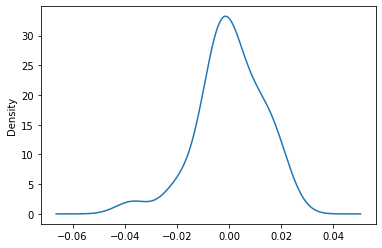

In [56]:
portfolio_val['Daily Return'].plot(kind='kde')

The Sharpe Ratio is a measure for calculating risk-adjusted return, and this ratio has become the industry standard for such calculations.

Sharpe ratio = (Mean portfolio return − Risk-free rate)/Standard deviation of portfolio return

The original Sharpe Ratio

Annualized Sharpe Ratio = K-value * SR

K-values for various sampling rates:

Daily = sqrt(252)
Weekly = sqrt(52)
Monthly = sqrt(12)
Since I'm based in the USA, I will use a very low risk-free rate (the rate you would get if you just put your money in a bank, its currently very low in the USA, let's just say its ~0% return). If you are in a different country with higher rates for your trading currency, you can use this trick to convert a yearly rate with a daily rate:

daily_rate = ((1.0 + yearly_rate)**(1/252))-1

Other values people use are things like the 3-month treasury bill or LIBOR.@

In [57]:
SR = portfolio_val['Daily Return'].mean()/portfolio_val['Daily Return'].std()

In [58]:
SR

0.03515117757275398

In [59]:
ASR = (252**0.5)*SR

In [60]:
ASR

0.5580076448914685

In [61]:
portfolio_val['Daily Return'].std()

0.012413783239420488

In [62]:
portfolio_val['Daily Return'].mean()

0.00043635909899854676

<AxesSubplot:ylabel='Density'>

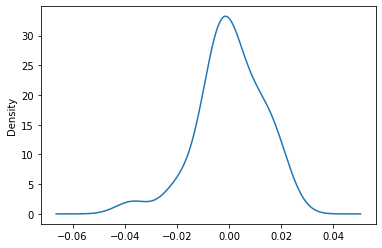

In [64]:
portfolio_val['Daily Return'].plot(kind='kde')

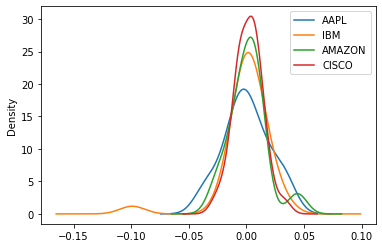

In [70]:
aapl['Adj Close'].pct_change(1).plot(kind='kde', label='AAPL')
ibm['Adj Close'].pct_change(1).plot(kind='kde', label='IBM')
amzn['Adj Close'].pct_change(1).plot(kind='kde', label='AMAZON')
cisco['Adj Close'].pct_change(1).plot(kind='kde', label='CISCO')
plt.legend()

In [68]:
import numpy as np
np.sqrt(252)* (np.mean(.001-0.0002)/.001)

12.699606293110037